# Problem Statement:

The Toxic Pesticides
Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

You need to daetermine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
#from google.colab import files
#files.upload()

In [ ]:
train = pd.read_csv("train_yaOffsB.csv")
test = pd.read_csv("test_pFkWwen.csv")
sample = pd.read_csv("sample_submission_O1oDc4H.csv")

In [ ]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [ ]:
train.Crop_Damage.value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [ ]:
2313/(2313+74238+12307)

0.026030295527695875

In [ ]:
train.Pesticide_Use_Category.value_counts()

2    63709
3    24312
1      837
Name: Pesticide_Use_Category, dtype: int64

In [ ]:
train.Number_Doses_Week.value_counts()

20    22589
40    12298
10    12111
30    10438
15     8178
5      5520
25     4890
60     4367
50     3361
35     1832
45      936
0       837
80      672
70      303
55      277
90       83
65       64
75       61
95       30
85       11
Name: Number_Doses_Week, dtype: int64

In [ ]:
train.Season.value_counts()

2    44210
1    26902
3    17746
Name: Season, dtype: int64

In [ ]:
train.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [ ]:
test.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

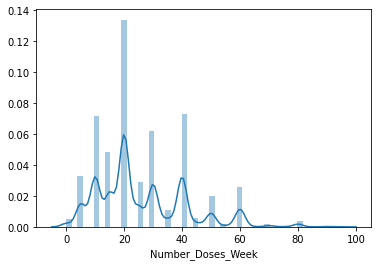

In [ ]:
sns.distplot(train["Number_Doses_Week"])

In [ ]:
train["Estimated_Insects_Count"] = np.sqrt(train["Estimated_Insects_Count"])
test["Estimated_Insects_Count"] = np.sqrt(test["Estimated_Insects_Count"])

# Missing value Treatment:

In [ ]:
a = train[train['Number_Weeks_Used'].isnull()]
b = test[test['Number_Weeks_Used'].isnull()]

In [ ]:
impute_list_weeks_a = a['Number_Doses_Week'].unique()
impute_list_weeks_b = b['Number_Doses_Week'].unique()

In [ ]:
l1a = []
for i in impute_list_weeks_a:
    print(i)
    if i == 0:
        l1a.append(0)
    else:
        l1a.append(train[train['Number_Doses_Week'] == i]['Number_Weeks_Used'].median())
        
        

0
30
10
45
20
50
40
5
15
25
35
60
80
70
55
90
65
95
75


In [ ]:
l1b = []
for i in impute_list_weeks_b:
    print(i)
    if i == 0:
        l1b.append(0)
    else:
        l1b.append(test[test['Number_Doses_Week'] == i]['Number_Weeks_Used'].median())
        
        

0
30
60
40
10
50
20
35
5
15
25
45
70
80
55
75
65
90


In [ ]:
train["Number_Weeks_Used_Treated"] = train['Number_Doses_Week'].replace(impute_list_weeks_a,l1a)
test["Number_Weeks_Used_Treated"] = test['Number_Doses_Week'].replace(impute_list_weeks_b,l1b)

In [ ]:
mask_a = train['Number_Weeks_Used'].isnull()
mask_b = test['Number_Weeks_Used'].isnull()

In [ ]:
train['Number_Weeks_Used'] = train['Number_Weeks_Used'].mask(mask_a, train["Number_Weeks_Used_Treated"])
test['Number_Weeks_Used'] = test['Number_Weeks_Used'].mask(mask_b, test["Number_Weeks_Used_Treated"])

In [ ]:
train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage',
       'Number_Weeks_Used_Treated'],
      dtype='object')

# Feature Engineering:

In [ ]:
train['Total_doses_used'] = train['Number_Doses_Week'] * train["Number_Weeks_Used"]
test['Total_doses_used'] = test['Number_Doses_Week'] * test["Number_Weeks_Used"]

In [ ]:
train[['Pesticide_Use_Category','Season']] = train[['Pesticide_Use_Category','Season']].astype(object)
test[['Pesticide_Use_Category','Season']] = test[['Pesticide_Use_Category','Season']].astype(object)

In [ ]:
train.drop("ID",axis = 1,inplace = True)

In [ ]:
test.drop("ID",axis = 1,inplace = True)

In [ ]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [ ]:
test.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit',
       'Number_Weeks_Used_Treated', 'Total_doses_used',
       'Pesticide_Use_Category_1', 'Pesticide_Use_Category_2',
       'Pesticide_Use_Category_3', 'Season_1', 'Season_2', 'Season_3'],
      dtype='object')

# Model Building:

In [ ]:
x = train[['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit','Total_doses_used',
       'Pesticide_Use_Category_1', 'Pesticide_Use_Category_2',
       'Pesticide_Use_Category_3', 'Season_1', 'Season_2', 'Season_3']]
y = train['Crop_Damage']

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.10, random_state=1)

In [ ]:
y_train.value_counts()

0    66848
1    11052
2     2072
Name: Crop_Damage, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Dt = DecisionTreeClassifier()

In [ ]:
Dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred_dt = Dt.predict(X_val)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_val,y_pred_dt))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      7390
           1       0.23      0.25      0.24      1255
           2       0.05      0.05      0.05       241

    accuracy                           0.74      8886
   macro avg       0.38      0.38      0.38      8886
weighted avg       0.75      0.74      0.74      8886



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_m = RandomForestClassifier()

In [ ]:
forest_m.fit(X_train_new,y_train_new)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_f = forest_m.predict(X_val)

In [ ]:
print(classification_report(y_val,y_pred_f))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     14800
           1       0.32      0.21      0.26      2520
           2       0.10      0.06      0.08       452

    accuracy                           0.80     17772
   macro avg       0.43      0.40      0.41     17772
weighted avg       0.77      0.80      0.78     17772



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
paramgrid = {"max_depth":list(range(1,20,2)),"n_estimators":list(range(1,200,20))}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(random_state = 1),paramgrid)

In [ ]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=61,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg_m = XGBClassifier()

In [ ]:
grid_m =  XGBClassifier(base_score=0.1, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=10, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='multi:softmax', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
grid_m.fit(X_train,y_train)

XGBClassifier(base_score=0.1, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=10, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_x = grid_m.predict(X_val)

In [ ]:
print(classification_report(y_val,y_pred_x))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      7390
           1       0.53      0.18      0.27      1255
           2       0.00      0.00      0.00       241

    accuracy                           0.84      8886
   macro avg       0.46      0.39      0.39      8886
weighted avg       0.79      0.84      0.80      8886



In [ ]:
xtest = test[['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit', 'Total_doses_used',
       'Pesticide_Use_Category_1', 'Pesticide_Use_Category_2',
       'Pesticide_Use_Category_3', 'Season_1', 'Season_2', 'Season_3']]

In [ ]:
xtest = sc.transform(xtest)
y_pred_x = grid_m.predict(xtest)
#y_pred_x = [np.argmax(line) for line in y_pred_x]

In [ ]:
t = pd.read_csv("test_pFkWwen.csv")

In [ ]:
df = t["ID"]

In [ ]:
df = pd.DataFrame(df)

In [ ]:
df['Crop_Damage'] = y_pred_x 

In [ ]:
df.head()

,ID,Crop_Damage
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1


In [ ]:
df.to_csv("submission.csv", index = False)

In [ ]:
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>